In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import sklearn.preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm
matplotlib.rcParams['font.family']='SimHei'

In [2]:
wb = pd.read_excel('..\\datasets\\figure.xlsx',sheetname='hourglass')
wb.dropna(inplace=True,axis=1)
wb.head()

,id,height,chest,lower_chest,waist,upper_butt,middle_butt
0,1,163,83,70,70,74,88
1,2,158,81,68,68,72,86
2,3,165,85,71,70,75,89
3,4,170,88,73,73,78,92
4,5,164,84,71,70,75,89


In [3]:
complete = pd.read_excel('..\\datasets\\figure.xlsx',sheetname='complete')
complete.dropna(inplace=True,axis=1)
complete.head()

,id,height,chest,lower_chest,waist,upper_butt,middle_butt,type
0,1,154,82,75,76,79,83,apple
1,2,161,88,78,79,84,87,apple
2,3,157,84,76,78,79,85,apple
3,4,165,90,81,80,84,89,apple
4,5,173,96,87,85,89,94,apple


In [4]:
# 加载训练前的数据
before = pd.read_excel('..\\datasets\\figure.xlsx',sheetname='before')
before.dropna(inplace=True,axis=1)
before.head()

,id,height,chest,lower_chest,waist,upper_butt,middle_butt,type
0,1,154,82,75,76,79,83,apple
1,2,161,88,78,79,84,87,apple
2,3,157,84,76,78,79,85,apple
3,4,165,90,81,80,84,89,apple
4,5,173,96,87,85,89,94,apple


In [5]:
# 加载训练后的数据
after = pd.read_excel('..\\datasets\\figure.xlsx',sheetname='after')
after.dropna(inplace=True,axis=1)
after.head()

,id,height,chest,lower_chest,waist,upper_butt,middle_butt,type
0,1,154,79,67,66,70,83,apple
1,2,161,83,70,69,74,87,apple
2,3,157,81,68,68,72,85,apple
3,4,165,85,71,70,75,89,apple
4,5,173,89,75,74,79,94,apple


In [6]:
# 加载苹果型的计划数据
apple_plan = pd.read_excel('..\\datasets\\fit_plan.xlsx',sheetname='apple')
apple_plan.dropna(inplace=True,axis=1)
apple_plan.head()

,动作,名称,组数,负荷,时间,备注
0,动作一,肩部灵活性,4,木棍,5,肩部训练
1,动作二,坐姿推肩,6,20RM*20,7,肩部训练
2,动作三,高位下拉,6,25RM*20/25,8,肩部训练
3,动作四,坐姿划船,6,15RM*13/15,7,肩部训练
4,动作五,快走,1,速度9-10km/h,40,肩部训练


In [7]:
# 加载梨型的计划数据
pear_plan = pd.read_excel('..\\datasets\\fit_plan.xlsx',sheetname='pear')
pear_plan.dropna(inplace=True,axis=1)
pear_plan.head()

,动作,名称,组数,负荷,时间,备注
0,动作一,肩部灵活性,3,木棍,5,肩部手臂训练
1,动作二,坐姿推肩,5,15RM*12/15,5,肩部手臂训练
2,动作三,水平后展,3,15RM*12/15,4,肩部手臂训练
3,动作四,杠铃弯举,3,25RM*22/25,5,肩部手臂训练
4,动过五,绳索下压,3,25RM*22/25,5,肩部手臂训练


In [8]:
# 加载报纸型的计划数据
paper_plan = pd.read_excel('..\\datasets\\fit_plan.xlsx',sheetname='paper')
paper_plan.dropna(inplace=True,axis=1)
paper_plan.head()

,动作,名称,组数,负荷,时间,备注
0,动作一,肩部灵活性,4,木棍（无）,3,肩部背部训练
1,动作二,坐姿推肩,6,10RM*8,5,肩部背部训练
2,动作三,高位下拉,6,10RM*8/10,5,肩部背部训练
3,动作四,坐姿划船,6,10RM*8/10,7,肩部背部训练
4,动作五,硬拉,4,5RM*3/5,5,肩部背部训练


In [35]:
sort_height = wb.sort_values('height').copy()

In [27]:
sort_chest = wb.sort_values('chest').copy()
sort_lower_chest = wb.sort_values('lower_chest').copy()
sort_waist = wb.sort_values('waist').copy()
sort_shoulder = wb.sort_values('shoulder').copy()
sort_middle_butt = wb.sort_values('middle_butt').copy()

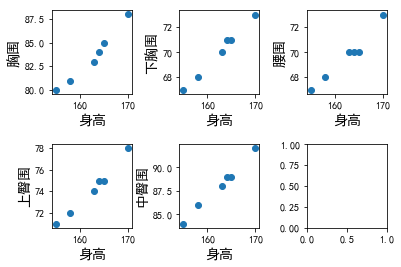

In [45]:
fig, axes = plt.subplots(2,3)
ax0,ax1,ax2,ax3,ax4,ax5 = axes.ravel()
ax0.set_ylabel('胸围', fontproperties='SimHei', fontsize=14)
ax1.set_ylabel('下胸围', fontproperties='SimHei', fontsize=14)
ax2.set_ylabel('腰围', fontproperties='SimHei', fontsize=14)
ax3.set_ylabel('上臀围', fontproperties='SimHei', fontsize=14)
ax4.set_ylabel('中臀围', fontproperties='SimHei', fontsize=14)

ax0.set_xlabel('身高', fontsize=14)
ax1.set_xlabel('身高', fontsize=14)
ax2.set_xlabel('身高', fontsize=14)
ax3.set_xlabel('身高', fontsize=14)
ax4.set_xlabel('身高', fontsize=14)

# ax0.plot(sort_height.height,sort_height.chest)
# ax1.plot(sort_height.height,sort_height.lower_chest)
# ax2.plot(sort_height.height,sort_height.waist)
# ax3.plot(sort_height.height,sort_height.upper_butt)
# ax4.plot(sort_height.height,sort_height.middle_butt)
ax0.scatter(sort_height.height,sort_height.chest)
ax1.scatter(sort_height.height,sort_height.lower_chest)
ax2.scatter(sort_height.height,sort_height.waist)
ax3.scatter(sort_height.height,sort_height.upper_butt)
ax4.scatter(sort_height.height,sort_height.middle_butt)
fig.subplots_adjust(hspace=0.6)
fig.subplots_adjust(wspace=0.6)
# plt.title('Male Heights')
plt.show()

In [10]:
# 一元线性回归
length = len(sort_height.chest)
datasets_X = np.array(sort_height.height).reshape([length,1])
datasets_Y = np.array(sort_height.chest)

linreg = LinearRegression()
linreg.fit(datasets_X,datasets_Y )

X_pred = np.array([170,160,150]).reshape([-1,1])
y_pred = linreg.predict(X_pred)
print("回归系数：",linreg.coef_)
print("回归截距：",linreg.intercept_ )
print("回归检验：", y_pred)

回归系数： [ 0.5335689]
回归截距： -3.20494699647
回归检验： [ 87.50176678  82.16607774  76.83038869]


In [66]:
# 一元线性回归函数
def figure_linear(x,y,name):
    length = len(x)
    datasets_X = np.array(x).reshape([length,1])
    datasets_Y = np.array(y)

    linreg = LinearRegression()
    linreg.fit(datasets_X,datasets_Y )

    y_pred = linreg.predict(75)
    print(name,"回归系数：",linreg.coef_," 回归截距：",linreg.intercept_,"回归检验：", y_pred)
    
    minX = min(datasets_X)
    maxX = max(datasets_X)
    X = np.arange(minX,maxX).reshape([-1,1])

    plt.scatter(datasets_X, datasets_Y, color = 'red')
    plt.plot(X, linear.predict(X), color = 'blue')

In [40]:
 # 一元线性回归并作图函数
def figure_linear(x,y,name):
    length = len(x)
    datasets_X = np.array(x).reshape([length,1])
    datasets_Y = np.array(y)

    linreg = LinearRegression()
    linreg.fit(datasets_X,datasets_Y )

    y_pred = linreg.predict(75)
    print(name,"回归系数：",linreg.coef_," 回归截距：",linreg.intercept_,"回归检验：", y_pred)
    minX = min(datasets_X)
    maxX = max(datasets_X)
    X = np.arange(minX,maxX).reshape([-1,1])

    # 图像中显示
    plt.ylabel('胸围', fontproperties='SimHei', fontsize=14)
    plt.xlabel('身高', fontsize=14)
    plt.scatter(datasets_X, datasets_Y, color = 'red')
#     plt.plot(datasets_X, datasets_Y, color = 'red')
    plt.plot(X, linreg.predict(X), color = 'blue')
    plt.show()

胸围 回归系数： [ 0.5335689]  回归截距： -3.20494699647 回归检验： [ 36.81272085]


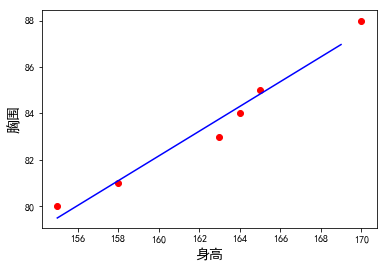

In [41]:
figure_linear(sort_height.height,sort_height.chest,"胸围")

In [ ]:
# 一元线性回归并预测函数函数
def figure_linear(x,y,name):
    length = len(x)
    datasets_X = np.array(x).reshape([length,1])
    datasets_Y = np.array(y)

    linreg = LinearRegression()
    linreg.fit(datasets_X,datasets_Y )

    y_pred = linreg.predict(75)
    print(name,"回归系数：",linreg.coef_," 回归截距：",linreg.intercept_,"回归检验：", y_pred)

In [9]:
# 预测类
class Predict():
    def __init__(self):
        self.features = ['chest', 'lower_chest', 'waist', 'upper_butt','middle_butt']
        self.names = ["胸围", "下胸围", "腰围", "上臀围", "中臀围"]
        self.coef = dict()
        self.max = dict()
    def figure_linear(self,x,y,feature,name):
        #self.features.append(feature)
        length = len(x)
        datasets_X = np.array(x).reshape([length,1])
        datasets_Y = np.array(y)

        linreg = LinearRegression()
        linreg.fit(datasets_X,datasets_Y )
        self.coef[feature] = linreg
        
        print(name,"回归系数：",linreg.coef_," 回归截距：",linreg.intercept_)

    """
    根据工作表和标准身材计算出本表中所有人的身材得分
    """
    def get_score(self,wb,before):
        heights = np.array(wb.height).reshape([-1,1])
        score_sum = 0
        
        for i in range(5):
            feature = self.features[i]
            X_pred = self.coef[feature].predict(heights)
            delta = np.abs(X_pred - wb[feature])
            if before:
                self.max[feature] = feature_max = np.max(delta) * 1.33
            else:
                feature_max = self.max[feature]
            score_sum  = score_sum + (1 - delta / feature_max) * 20
            
        return score_sum 
    """
    主生成模型函数，利用沙漏型身材来生成最佳的模型，以
    身高为因变量来实现对各身材指标的预测
    """
    def create_model(self,wb):
        sort_wb = wb.sort_values('height')
        for i in range(5):
            feature = self.features[i]
            x = sort_wb['height']
            y = sort_wb[feature]
            name = self.names[i]
            self.figure_linear(x,y,feature,name)

In [10]:
test_pred = Predict()
test_pred.create_model(wb)

胸围 回归系数： [ 0.5335689]  回归截距： -3.20494699647
下胸围 回归系数： [ 0.40989399]  回归截距： 3.39222614841
腰围 回归系数： [ 0.38162544]  回归截距： 7.65253239105
上臀围 回归系数： [ 0.46289753]  回归截距： -1.05418138987
中臀围 回归系数： [ 0.51590106]  回归截距： 4.16607773852


In [11]:
test_pred.get_score(before,True)

0     77.649689
1     75.964811
2     78.390037
3     76.300987
4     70.803640
5     70.645174
6     68.540674
7     63.653443
8     73.705331
9     72.829667
10    63.075062
11    57.309058
12    55.863728
13    56.097333
14    63.485166
15    62.929399
16    64.533845
17    56.814506
18    54.809823
19    57.870979
20    63.485166
21    60.781763
22    60.607950
23    52.777681
24    90.508473
25    94.232848
26    90.713797
27    91.727171
28    94.762106
29    87.294562
30    88.515506
31    83.354167
32    74.659081
33    78.975021
34    94.171065
35    80.161418
dtype: float64

In [12]:
test_pred.get_score(after,False)

0     98.588965
1     98.767766
2     98.965983
3     99.027511
4     98.611859
5     98.413656
6     98.788416
7     97.773582
8     97.729052
9     97.946395
10    94.241134
11    85.191924
12    98.255099
13    99.497204
14    99.106824
15    98.693056
16    99.091680
17    99.129587
18    98.982357
19    98.578786
20    99.106824
21    97.211265
22    99.116510
23    99.108904
24    98.010429
25    98.458778
26    98.806492
27    99.130493
28    99.381455
29    97.499385
30    97.989558
31    97.386441
32    97.413815
33    97.420030
34    98.939801
35    96.274834
dtype: float64

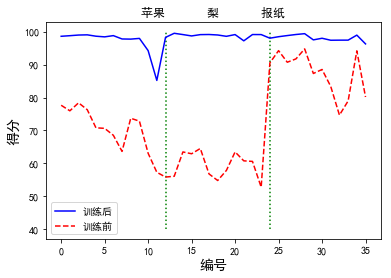

In [13]:
before_score = test_pred.get_score(before,True)
after_score = test_pred.get_score(after,False)
delta_score = after_score - before_score
X = np.arange(len(before_score)).reshape([-1,1])

# 图像中显示
plt.ylabel('得分', fontproperties='SimHei', fontsize=14)
plt.xlabel('编号', fontsize=14)
plt.plot(X, after_score, color = 'blue',label='训练后')
plt.plot(X, before_score, color = 'red',ls='--',label='训练前')
plt.vlines(12, 40,100, colors = "green", linestyles = "dotted")
plt.vlines(24, 40,100, colors = "green", linestyles = "dotted")
plt.title('苹果       梨       报纸')
plt.legend()
plt.show()


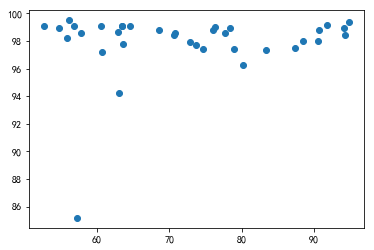

In [32]:
plt.scatter(before_score,after_score)
plt.show()

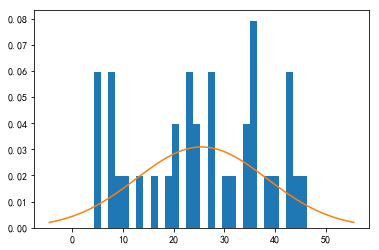

In [29]:
# 验证得分差的正态性
plt.figure()
delta_range = np.arange(-30, 30, 0.01) + np.mean(delta_score)
np.arange(np.max(delta_score), np.min(delta_score), 0.01)
delta_norm = norm.pdf(delta_range, np.mean(delta_score), np.std(delta_score,ddof=1))
plt.hist(delta_score, bins=30, normed=True, histtype='bar')
plt.plot(delta_range, delta_norm)
plt.show()

In [15]:
# 使用SVM对身材进行分类
features = ['height','chest', 'lower_chest', 'waist', 'upper_butt','middle_butt']
X = complete.loc[:, features]# 训练完成，执行测试

# linear核函数的ACC
#metrics.accuracy_score(y_test, y_pred_
y = complete.type
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.33)
clf_linear = svm.SVC(kernel='linear', gamma=0.7, C=1.0, probability=True)
clf_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.7, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# 训练完成，执行测试
y_pred_class = clf_linear.predict(X_test)
# linear核函数的ACC
metrics.accuracy_score(y_test, y_pred_class)

1.0

In [77]:
np.array(complete.loc[40,features]).reshape([1,6])[0,0]

164

In [34]:
clf_linear.predict(np.array(complete.loc[40,features]).reshape([1,6]))

array(['hourglass'], dtype=object)

In [17]:
 clf_linear.predict(complete.loc[34:40,features])

array(['paper', 'paper', 'hourglass', 'hourglass', 'hourglass',
       'hourglass', 'hourglass'], dtype=object)

## 假设检验 是否有效
### 第一步 提出假设
$ H_0 : \mu = 0 \quad(没有效果)\quad H_1 : \mu > 0 \quad(有效果） $ 
### 第二步 计算检验统计量的值
#### 由样本得出：
$ \bar X = \frac{X_1 + \cdots X_n} {n} \quad S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i - \bar X)^2 $  

$t_0 = \frac{\bar X - \mu_0}{s/ \sqrt n}$
### 第三步  
计算P值 决策是否拒绝原假设  

$ P < 0.01 \quad 拒绝原假设 训练有效$  
$ P > 0.01 \quad 接受原假设 训练无效$  
### 结论  
最终P_value=8.1264754699280525e-14 远小于显著性水平  
顾拒绝原假设，训练有效

In [17]:
n = len(delta_score)
t = (np.mean(delta_score) - 0) / np.std(delta_score,ddof=1) * n**0.5
print('t 值: ', t, '\n', '检验结果',stats.ttest_1samp(delta_score, 15))

t 值:  11.861655486316225 
 检验结果 Ttest_1sampResult(statistic=4.8890397044327516, pvalue=2.2420987658646683e-05)


In [80]:
{'a':apple_plan}

{'a':      动作       名称    组数            负荷  时间      备注
 0   动作一    肩部灵活性     4            木棍   5    肩部训练
 1   动作二     坐姿推肩     6       20RM*20   7    肩部训练
 2   动作三     高位下拉     6    25RM*20/25   8    肩部训练
 3   动作四     坐姿划船     6    15RM*13/15   7    肩部训练
 4   动作五       快走     1    速度9-10km/h  40    肩部训练
 5   动作一     山羊挺身     5         自重*15   5    背部训练
 6   动作二     俯身划船     6    15RM*12/15  10    背部训练
 7   动作三       硬拉     6    25RM*20/25   8    背部训练
 8   动作四     水平后展     5    15RM*12/15   7    背部训练
 9   动作五       快走     1    速度9-10km/h  40    背部训练
 10  动作一  侧支撑静力支撑  8L/R        自重*30”   5  核心腰腹训练
 11  动作二   俯身爬行移动     6         自重*5米   5  核心腰腹训练
 12  动作三     仰撑平板     3        自重*60秒   4  核心腰腹训练
 13  动作四     俯撑平板     3        自重*90”   5  核心腰腹训练
 14  动过五       卷腹     3    15RM*12/15   5  核心腰腹训练
 15  动作六       卷腹     3    25RM*22/25   8  核心腰腹训练
 16  动作七   负重站姿转体  6L/R    25RM*22/25  10  核心腰腹训练
 17  动作八       有氧     1  心率130-150次/分  50  核心腰腹训练}

In [194]:
# 创建规划类
class Plan(Predict):
    """

    """
    def __init__(self, apple_plan,pear_plan,paper_plan):
        self.features = ['height','chest', 'lower_chest', 'waist', 'upper_butt','middle_butt']
        self.names = ["胸围", "下胸围", "腰围", "上臀围", "中臀围"]
        self.ctype = {'apple':'苹果型','pear':'梨形','paper':'报纸型','hourglass':'沙漏型'}
        self.type = ['apple','pear','paper','hourglass']
        self.plans = {'apple':apple_plan, 'pear':pear_plan, 'paper':paper_plan}
        self.coef = dict()
        self.max = dict()
        self.plan = dict()
    """
    输入：训练集
    输出储存：模型
    """
    def create_classifier(self,wb):
        X = wb.loc[:, self.features]# 训练完成，执行测试

        # linear核函数的ACC
        y = wb.type
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.33)
        clf_linear = svm.SVC(kernel='linear', gamma=0.7, C=1.0, probability=True)
        clf_linear.fit(X_train, y_train)
        self.classifier = clf_linear
        
        return 
    """
    输入：身材数据
    输出：类型
    """
    def get_type(self,data):
        length = len(self.features)
        data = np.array(data).reshape([1,length])
        Type = self.classifier.predict(data)
        return Type  
    """
    输入：训练前列表
    输出（存储）：feature max 指标
    """
    def create_feature_max(self, wb):
        heights = np.array(wb.height).reshape([-1,1])
        score_sum = 0
        
        for i in range(5):
            feature = self.features[i+1]
            X_pred = self.coef[feature].predict(heights)
            delta = np.abs(X_pred - wb[feature])
            self.max[feature] = np.max(delta) * 1.33

    """
    输入：身材数据
    输出：得分
    """       
    def get_score(self,data):
        heights = data[0,0]
        score_sum = 0
        
        for i in range(5):
            feature = self.features[i+1]
            X_pred = self.coef[feature].predict(heights)
            delta = np.abs(X_pred - data[:,i])
            feature_max = self.max[feature]
            score_sum  = score_sum + (1 - delta / feature_max) * 20
            
        return score_sum
    """
    输入：类型，身材数据
    输出：身材计划
    """
    def get_plan(self, data):
        length = len(self.features)
        data = np.array(data).reshape([1,length])
        Type = self.classifier.predict(data)[0]
        score = self.get_score(data)
        print('当前得分:', score)
        print('身材类型:', self.ctype[Type])
        if (Type != 'hourglass'):
            print('训练计划如下所示')
            return self.plans[Type]
        else: print('Congratulation!!! Keep up the spirit!')
    """
    输入: 当前身材数据
    输出：天数
    假定获取理想身材需要100天
    """    
    def get_time(self, data):
        length = len(self.features)
        data = np.array(data).reshape([1,length])
        Type = self.classifier.predict(data)[0]
        deduct = 100 - self.get_score(data)
        shade = 1.33
        print('身材类型', self.ctype[Type])
        if (Type != 'hourglass'):
            days = np.round(deduct[0] * shade)
            time = self.plans[Type]['时间'].sum()
            hours = np.round(time / 60) * days
            print('预测需要坚持 %d 天'%days)
            print('预测需要锻炼 %d 小时'%hours )
            return  time
        else: print('Congratulation!!! Keep up the spirit!')
     
    
    def create_model(self,wb,before):
        sort_wb = wb.sort_values('height')
        for i in range(5):
            feature = self.features[i+1]
            x = sort_wb['height']
            y = sort_wb[feature]
            name = self.names[i]
            self.figure_linear(x,y,feature,name)
        self.create_feature_max(before)

In [195]:
# 生成产生计划的模型
plan_test = Plan(apple_plan,pear_plan,paper_plan)

In [196]:
# 建立SVM的身材类型
plan_test.create_classifier(complete)

In [197]:
# 建立预测模型
plan_test.create_model(complete,before)

胸围 回归系数： [ 0.07845159]  回归截距： 76.7963726685
下胸围 回归系数： [ 0.49254851]  回归截距： -2.69481675883
腰围 回归系数： [ 0.43996626]  回归截距： 6.10653919455
上臀围 回归系数： [ 0.38490018]  回归截距： 17.8429562283
中臀围 回归系数： [ 0.46864748]  回归截距： 10.8815571594


In [198]:
# 获取锻炼的人员进行分类
tn = 11
plan_test.get_type(complete.loc[tn,plan_test.features])

array(['apple'], dtype=object)

In [199]:
# 获取预测需要的时间
plan_test.get_time(complete.loc[tn,plan_test.features])

身材类型 苹果型
预测需要坚持 88 天
预测需要锻炼 352 小时


229

In [200]:
plan_test.get_plan(complete.loc[tn,plan_test.features])

当前得分: [33.492566010742223]
身材类型: 苹果型
训练计划如下所示


,动作,名称,组数,负荷,时间,备注
0,动作一,肩部灵活性,4,木棍,5,肩部训练
1,动作二,坐姿推肩,6,20RM*20,7,肩部训练
2,动作三,高位下拉,6,25RM*20/25,8,肩部训练
3,动作四,坐姿划船,6,15RM*13/15,7,肩部训练
4,动作五,快走,1,速度9-10km/h,40,肩部训练
5,动作一,山羊挺身,5,自重*15,5,背部训练
6,动作二,俯身划船,6,15RM*12/15,10,背部训练
7,动作三,硬拉,6,25RM*20/25,8,背部训练
8,动作四,水平后展,5,15RM*12/15,7,背部训练
9,动作五,快走,1,速度9-10km/h,40,背部训练


In [52]:
# 获取模型
plan1 = plan_test.get_plan(complete.loc[tn,plan_test.features])